# Classic MDS (CMDSCALE) - Euclidean

In [1]:
import pandas as pd
A = pd.read_excel("./data/Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_MDS_SOURCE",index_col=0)
display(A)

,CYL,PUISS,LONG,LARG,POIDS,VMAX
Modele,,,,,,
Toyota Corolla,1166,55,399,157,815,140
Lada 1300,1294,68,404,161,955,140
Alfasud TI,1350,79,393,161,870,165
Lancia Beta,1297,82,429,169,1080,160
Mazda 9295,1769,83,440,165,1095,165
Fiat 132,1585,98,439,164,1105,165
Alfetta 1.66,1570,109,428,162,1060,175
Princess 1800,1798,82,445,172,1160,158
Audi 100,1588,85,468,177,1110,160


In [2]:
DSupp = pd.read_excel("./data/Data_Methodes_Factorielles.xlsx",sheet_name="AUTOS_MDS_SUPP",index_col=0)
B = pd.read_excel("./data/Data_Methodes_Factorielles.xlsx",index_col=0,sheet_name="DATA_ACP_ACTIF")
B = B.loc[DSupp.index,:]
B

,CYL,PUISS,LONG,LARG,POIDS,VMAX
Modele,,,,,,
Citroen GS Club,1222,59,412,161,930,151
Renault 30,2664,128,452,173,1320,180
Peugeot 504,1796,79,449,169,1160,154


In [3]:
D = pd.concat([A,B])
display(D)

,CYL,PUISS,LONG,LARG,POIDS,VMAX
Modele,,,,,,
Toyota Corolla,1166,55,399,157,815,140
Lada 1300,1294,68,404,161,955,140
Alfasud TI,1350,79,393,161,870,165
Lancia Beta,1297,82,429,169,1080,160
Mazda 9295,1769,83,440,165,1095,165
Fiat 132,1585,98,439,164,1105,165
Alfetta 1.66,1570,109,428,162,1060,175
Princess 1800,1798,82,445,172,1160,158
Audi 100,1588,85,468,177,1110,160


In [4]:
from scientisttools import CMDSCALE
my_cmds =CMDSCALE(n_components=2,ind_sup=[12,13,14],proximity="euclidean",normalized_stress=True,parallelize=False)
my_cmds.fit(D)

CMDSCALE(ind_sup=[12, 13, 14], n_components=2)

In [5]:
my_cmds.sup_coord_

,Dim.1,Dim.2
Modele,,
Citroen GS Club,-418.260083,19.707020
Renault 30,1065.891142,-165.824064
Peugeot 504,201.478597,16.499780


## Scree plot

In [6]:
# Valeurs propres
from scientisttools import get_eig
eig = get_eig(my_cmds)
display(eig.round(2))

,eigenvalue,difference,proportion,cumulative
Dim.1,1110687.72,1031471.26,93.07,93.07
Dim.2,79216.46,77393.45,6.64,99.70


## Coordinates

In [7]:
from scientisttools import get_mds
result = get_mds(my_cmds)
result.keys()

dict_keys(['coord', 'dist', 'res_dist', 'stress', 'inertia'])

In [8]:
result["coord"]

,Dim.1,Dim.2
Toyota Corolla,-514.368216,-65.795531
Lada 1300,-342.766700,14.875213
Alfasud TI,-322.669602,-85.483117
Lancia Beta,-290.429211,131.454491
Mazda 9295,151.927781,-33.798481
Fiat 132,-13.716817,46.156247
Alfetta 1.66,-44.526156,9.763934
Princess 1800,203.304446,15.419721
Audi 100,-7.649174,52.420252
Taunus 2000,353.774482,-132.490668


## Eigenvalues

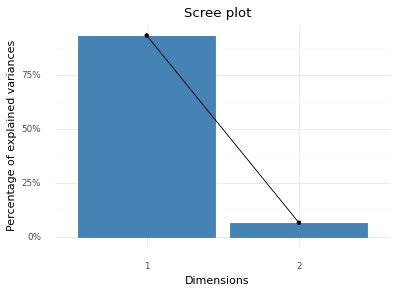

In [9]:
from scientisttools import fviz_screeplot
p = fviz_screeplot(my_cmds)
print(p)

## Individuals coordinates

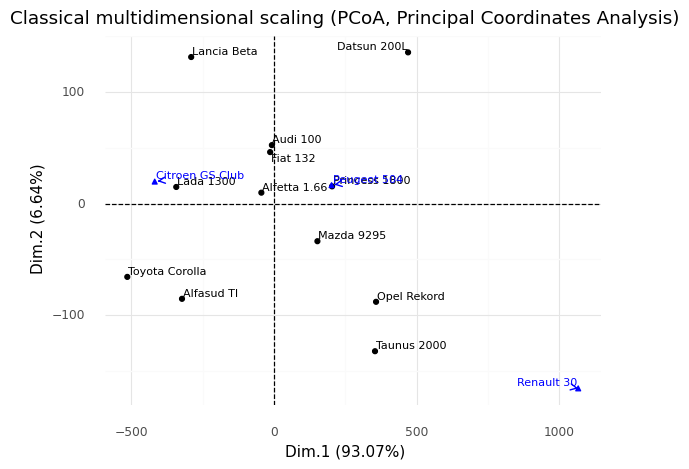

In [10]:
from scientisttools import fviz_cmdscale
p = fviz_cmdscale(my_cmds,repel=True)
print(p)

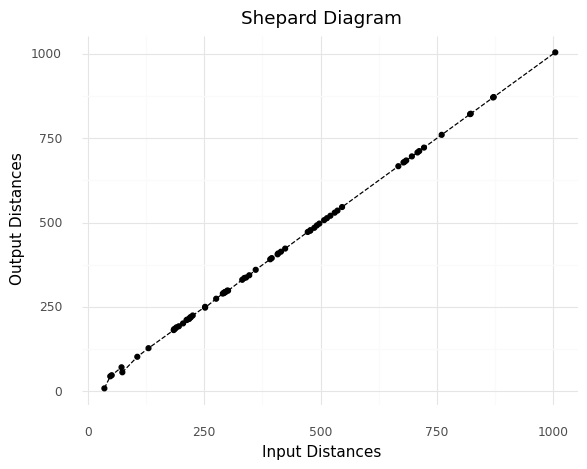

In [11]:
from scientisttools import fviz_shepard
p = fviz_shepard(my_cmds)
print(p)

In [12]:
my_cmds2 =CMDSCALE(n_components=2,ind_sup=[12,13,14],proximity="euclidean",normalized_stress=True,parallelize=False)
my_cmds2.fit_transform(D)

,Dim.1,Dim.2
Toyota Corolla,-514.368216,-65.795531
Lada 1300,-342.766700,14.875213
Alfasud TI,-322.669602,-85.483117
Lancia Beta,-290.429211,131.454491
Mazda 9295,151.927781,-33.798481
Fiat 132,-13.716817,46.156247
Alfetta 1.66,-44.526156,9.763934
Princess 1800,203.304446,15.419721
Audi 100,-7.649174,52.420252
Taunus 2000,353.774482,-132.490668


## Fit and transform

In [13]:
my_cmds3 = CMDSCALE(n_components=2,proximity="euclidean",normalized_stress=True,parallelize=False)
my_cmds3.fit(A)

CMDSCALE(n_components=2)

In [14]:
my_cmds3.transform(B)

,Dim.1,Dim.2
Modele,,
Citroen GS Club,-418.260083,19.707020
Renault 30,1065.891142,-165.824064
Peugeot 504,201.478597,16.499780
